# Project 3: Group 1: Lending Project

### Group Members:

In [1]:
print ("Jessica Lozano")
print ("Joeseph Perri")
print ("Marc Tabin") 
print ("Nesreen El-Rayes")

Jessica Lozano
Joeseph Perri
Marc Tabin
Nesreen El-Rayes


#### Tasks:
Add table of contents with links to blocks
Refrences

## Objective:

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loans = pd.read_csv('accepted-200000.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Description

In [ ]:
# Try to export to word file 
myfile=open("LCDataDictionary.txt") 
txt = myfile.read()
print(txt)

# Data Cleaning

https://www.kaggle.com/jw3570/p2p-lending-club-data-analysis

In [5]:
print(loans.isnull().sum(axis=0))

id                                                 0
member_id                                     199999
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       9930
emp_length                                      9914
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

print (loans.shape)


#clean_loans=loans.dropna()
#print (clean_loans.shape)

# delete the rows that have more than 100 cells blank
clean_rows=loans.dropna(axis='rows', thresh= 93)
print (clean_rows.shape)

clean_loans=clean_rows.dropna(axis='columns', thresh=1800)
print (clean_loans.shape)

print(clean_loans.head())

#clean_loans=loans.dropna(axis='rows')
#print (clean_loans.shape)

#Group 1:
# remove the cells with null values
#loans['loan_status'].value_counts(dropna=False)
# Normalize data
# loans['loan_status'].value_counts(normalize=True, dropna=False)



In [6]:
print (loans.shape)

# clean the columns that have cells with 190 K missing cells or more
clean_cols=loans.dropna(axis='columns', thresh=190000)
print (clean_cols.shape)


# delete the rows that have more than 92 cells blank
clean_loans=clean_cols.dropna(axis='rows', thresh= 92)


print(clean_loans.shape)



(199999, 151)
(199999, 92)
(176820, 92)


In [7]:
clean_loan_status = clean_loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]
print(clean_loan_status.shape)

# we removed anyone who is late but within 120 frame


(154174, 92)


In [9]:
print(clean_loan_status.isnull().sum(axis=0))
print (clean_loan_status.columns)

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
                             ..
mo_sin_o

Based on the previous step, after using threshold to drop columns with 95% or  more data points missing, and then dropping the rows that have 100% values missing. The Dataframe was reduced from  (199999, 151)to (1...., 92).

Next, we elimintaed the features that doesnot reveal any meaning, like ID, Zip code...etc. The selection of attributes was selected by consensus.

In [10]:
final_loans=clean_loan_status.drop(['id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','url','title','initial_list_status','pymnt_plan','policy_code','application_type','earliest_cr_line','last_credit_pull_d' ,'addr_state','hardship_flag','disbursement_method','debt_settlement_flag'],axis=1)

print (final_loans.shape)
print (final_loans.columns)
print (final_loans.head)
print (final_loans.describe)

(154174, 62)
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl

**Group 1: used records for fully paid and charged off, they dropped the rows with 30% or more of the cells missing and then selected the columns that may be interesting for the investor.
Loan Status:
Fully Paid            
Charged Off            
Current               
Late (31-120 days)      
In Grace Period          
Late (16-30 days)        
Default    

loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

Normalize the selected cols
loans['loan_status'].value_counts(normalize=True, dropna=False)

# Visualization

1) Add a chart that shows the distribution of Loan Amount (Histogram)
2) Add Pair plot to understand the nature of the data
3) Add chart for purpose for loan (My2PY group created descriptive stats table that looks good), their histogram is colored and looks good too, pub_rec_bankruptcies

Text(0.5, 1.0, 'Interest rate by Loan Status')

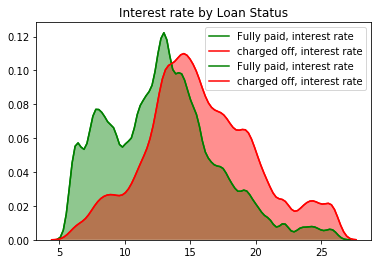

In [11]:
##### used data before cleaning until we decide:

loan_status_fullypaid= loans[loans['loan_status']=='Fully Paid']
loan_status_chargedoff = loans[loans['loan_status']=='Charged Off']

sns.kdeplot(loan_status_fullypaid['int_rate'], label="Fully paid, interest rate",shade=True, color="g")
sns.kdeplot(loan_status_chargedoff['int_rate'], label="charged off, interest rate",shade=True,color="r")
plt.title('Interest rate by Loan Status')





loan_status_fullypaid= loans[loans['loan_status']=='Fully Paid']
loan_status_chargedoff = loans[loans['loan_status']=='Charged Off']

sns.kdeplot(loan_status_fullypaid['int_rate'], label="Fully paid, interest rate",shade=True, color="g")
sns.kdeplot(loan_status_chargedoff['int_rate'], label="charged off, interest rate",shade=True,color="r")
plt.title('Interest rate by Loan Status')

# Data Coding-Dummies

In [26]:
# Get Dummies

df = pd.get_dummies(final_loans, columns=['emp_length','home_ownership','purpose','grade','verification_status','term'])

names =[col for col in df.columns if col not in ['emp_length','home_ownership','loan_status', 'purpose','grade','verification_status']]

# X and Y will be the new Independent and Dependant variables after excluding the variables
# listed in the description above:

X = df[names]
y_dummies = np.where(df['loan_status']=="Fully Paid", 1, 0)
X_dummies = X.drop(['term_ 36 months'],axis=1)

#print(X)

print (X_dummies)
print (y_dummies)

        loan_amnt  int_rate  installment  annual_inc    dti  delinq_2yrs  \
0         15000.0     12.39       336.64     78000.0  12.03          0.0   
1         10400.0      6.99       321.08     58000.0  14.92          0.0   
2         21425.0     15.59       516.36     63800.0  18.49          0.0   
4          7650.0     13.66       260.20     50000.0  34.81          0.0   
5          9600.0     13.66       326.53     69000.0  25.81          0.0   
6          2500.0     11.99        83.03     89000.0  13.77          0.0   
7         16000.0     11.44       351.40    109777.0  11.63          1.0   
8         23325.0     14.31       800.71     72000.0  27.03          1.0   
9          5250.0     11.44       172.98     26000.0  14.36          0.0   
10        10000.0     11.99       332.10     90000.0   8.44          0.0   
11        12975.0     17.86       468.17     60000.0  22.42          0.0   
12        17000.0     13.66       578.22     75000.0  23.63          0.0   
14         6

# Feature selection 

Group 1: They selected features manully, not a good method, we can use lasso and it is more efficient

# Questions

****Done*** 1) In Loan staus, what is the meaning of charged off? Ans: Charged off is hopeless case, a person who did not pay for 120 months


2) what is subgrade attribute, description is not clear?



3) After checking the first 100K, there are only Graduate students, no undergraduate. Which means this segment is not in the data that we have.


4) None of the reasons have "study loan"


5) I couldnot find loan application to check features like group 2 did?


# Ideas Marketing Plan

1) only 35 had payement plan, that could be an improvement from business perspective. A plan must be set and signed
2) Set a minimum timeframe for declined borrowers before they can re-apply, that will save processing and operations time. and also will help focus on borrowers with high likelyhood of paying back. Students are exluded from this section

Findingd from other groups:
-----------------------------------------
Group 1:
-------------
1) when the interest rate descrease, the % of borrowers who fully pay back increase.
2) Group one did visualization for the majority of the features in a boring way. Many charts are useless
3) dummy variable was used for loan status.
4) Train, test split was based on the month the loan was provided, in our case if we use 10 folds cross validation then that is not required.
5) No modeles posted after the split!

Group 2
------------
1) Kept the features in Loan application, they got the application from Lending club website
2) Used linear regression for loan status and selected the top 20 predictors and bottom 20 predictors
3) Used also NN (auc= .727), and cross validatoin (.71)


Lending Club:
--------------------
1) They have personal loan, business, Auto, Patient, the interest rate change accordingly




My 2 Py:
--------------------
1) Use Home owner as a separator feature